In [6]:
%matplotlib inline
import numpy as np
from  matplotlib import pyplot as plt 
from wigner import get_wigner, get_center_eigenvalues_differences, get_ensemble, get_semicircle_law
pi = np.pi
sqrt = np.sqrt


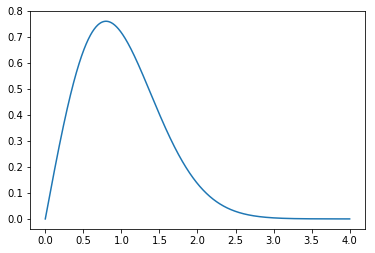

In [7]:
# l is lambda (eigenvalue)
ls = np.linspace(0, 4, 1000)
plt.plot(ls, [get_wigner(l) for l in ls])

In [8]:
def compare_wigner(num, dim, bins=30):
    '''
    Parameters:
        num <int> size of ensemble
        dim <int> dimension of matrix
        bin <int> histogram bin

    Return:
        return <figure>
    '''
    fig, ax1 = plt.subplots(1, 1)
    
    ensemble = get_ensemble(num, dim)
    center_list = get_center_eigenvalues_differences(list(ensemble), dim)
    
    ls = np.sort(center_list.real)
    norm_diffs = ls/np.mean(ls)
    
    xs, bins, p = ax1.hist(norm_diffs, bins=bins, normed=1)
    heights_wigner = [get_wigner(l) for l in ls]
    ax1.plot(ls, heights_wigner, linewidth=3, c="r")
    
    plt.show()
    return fig


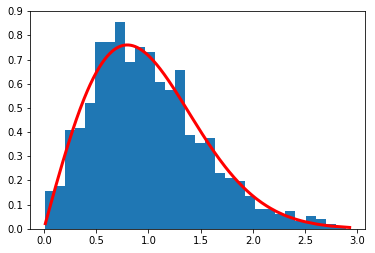

In [9]:
fig = compare_wigner(1000, 20)

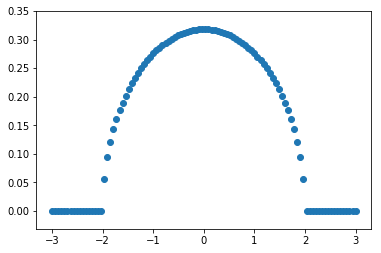

In [10]:

    

sigma = 1.
d = 3
ls = np.linspace(-d*sigma, d*sigma, 100)
rhos = [get_semicircle_law(l, sigma) for l in ls]
plt.scatter(ls, rhos)